# K-means clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
points = [[1,1],[1,2],[2,2],[2,3],[5,6],[13,12],[11,11],
             [7,7],[7,9],[9,7],[10,8],[3,3],[5,3]]
data = np.array(points)   
nc = 3   # no. of clusters 
kmeans = KMeans(n_clusters=nc, init='k-means++', 
                        max_iter=20, n_init=10, random_state=0)
labels = kmeans.fit(data)
print('clusters = ', nc, labels.labels_)

clusters =  3 [0 0 0 0 2 1 1 2 2 2 2 0 0]


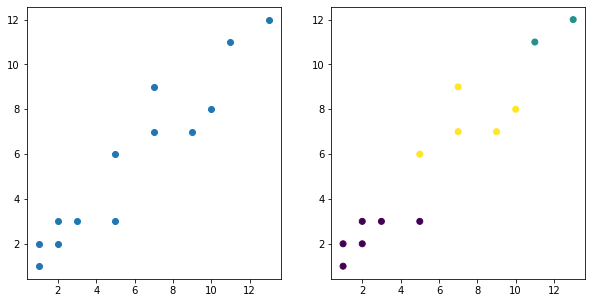

In [3]:
x = data[:,0]
y = data[:,1]
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(x,y)
ax2 = plt.subplot(1, 2, 2)
ax2.scatter(x,y, c=labels.labels_);

In [4]:
points = [[1,1],[1,2],[2,2],[2,3],[5,6],[13,12],[11,11],
             [7,7],[7,9],[9,7],[10,8],[3,3],[5,3]]   
data = np.array(points)

for nc in range(2,10):
        kmeans = KMeans(n_clusters=nc, init='k-means++', 
            max_iter=2, n_init=10, random_state=0)
        labels = kmeans.fit(data)
        print('clusters = ', nc, labels.labels_)
        print(f'inertia = {labels.inertia_:.3f}')
        print(f'sil score = {silhouette_score(data, labels.labels_)}')

clusters =  2 [0 0 0 0 0 1 1 1 1 1 1 0 0]
inertia = 81.786
sil score = 0.6001044104851272
clusters =  3 [0 0 0 0 2 1 1 2 2 2 2 0 0]
inertia = 37.567
sil score = 0.5706853478192079
clusters =  4 [2 2 2 2 0 1 1 3 3 3 3 2 0]
inertia = 22.100
sil score = 0.47561774943296065
clusters =  5 [0 0 0 0 2 3 3 4 4 1 1 0 2]
inertia = 15.600
sil score = 0.4337937922442338
clusters =  6 [4 4 4 4 0 3 3 5 5 1 1 4 2]
inertia = 11.100
sil score = 0.37529329972525904
clusters =  7 [2 2 6 6 0 1 1 4 4 3 3 6 5]
inertia = 7.333
sil score = 0.32055894731694146
clusters =  8 [5 5 1 1 6 7 0 2 2 3 3 1 4]
inertia = 4.833
sil score = 0.2419413769014861
clusters =  9 [0 0 5 5 7 6 2 8 1 4 4 5 3]
inertia = 2.833
sil score = 0.19892660138492083


In [5]:
points = [[1,1],[1,2],[2,2],[2,3],[5,6],[13,12],[11,11],
             [7,7],[7,9],[9,7],[10,8],[3,3],[5,3]]   
data = np.array(points)
d = {}
for nc in range(1,14):
    kmeans = KMeans(n_clusters=nc, init='k-means++', 
            max_iter=2, n_init=10, random_state=0)
    labels = kmeans.fit(data)
    print('clusters = ', nc, labels.labels_)
    print(f'inertia = {labels.inertia_:.3f}')
    print(f'clusters = {nc}  {labels.labels_}   inertia = {labels.inertia_:.3f}')
    d[nc] = labels.inertia_
    s = pd.Series(d)

clusters =  1 [0 0 0 0 0 0 0 0 0 0 0 0 0]
inertia = 352.462
clusters = 1  [0 0 0 0 0 0 0 0 0 0 0 0 0]   inertia = 352.462
clusters =  2 [0 0 0 0 0 1 1 1 1 1 1 0 0]
inertia = 81.786
clusters = 2  [0 0 0 0 0 1 1 1 1 1 1 0 0]   inertia = 81.786
clusters =  3 [0 0 0 0 2 1 1 2 2 2 2 0 0]
inertia = 37.567
clusters = 3  [0 0 0 0 2 1 1 2 2 2 2 0 0]   inertia = 37.567
clusters =  4 [2 2 2 2 0 1 1 3 3 3 3 2 0]
inertia = 22.100
clusters = 4  [2 2 2 2 0 1 1 3 3 3 3 2 0]   inertia = 22.100
clusters =  5 [0 0 0 0 2 3 3 4 4 1 1 0 2]
inertia = 15.600
clusters = 5  [0 0 0 0 2 3 3 4 4 1 1 0 2]   inertia = 15.600
clusters =  6 [4 4 4 4 0 3 3 5 5 1 1 4 2]
inertia = 11.100
clusters = 6  [4 4 4 4 0 3 3 5 5 1 1 4 2]   inertia = 11.100
clusters =  7 [2 2 6 6 0 1 1 4 4 3 3 6 5]
inertia = 7.333
clusters = 7  [2 2 6 6 0 1 1 4 4 3 3 6 5]   inertia = 7.333
clusters =  8 [5 5 1 1 6 7 0 2 2 3 3 1 4]
inertia = 4.833
clusters = 8  [5 5 1 1 6 7 0 2 2 3 3 1 4]   inertia = 4.833
clusters =  9 [0 0 5 5 7 6 2 8 1 4 4 5 3]


Text(0, 0.5, 'inertia')

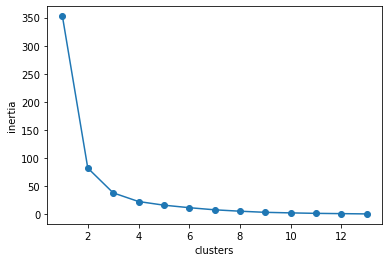

In [6]:
s.plot(marker='o')
plt.xlabel('clusters')
plt.ylabel('inertia')

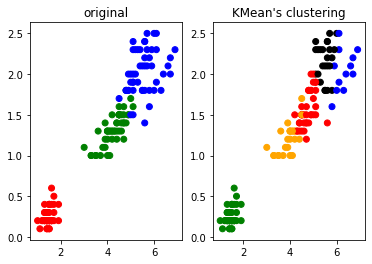

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris.data, columns=['sepal-len', 'sepal-wid',
                                         'petal-len', 'petal-wid'])
y = pd.DataFrame(iris.target, columns=['iristype'])
iris_targets_legend = np.array(iris.target_names)
model = KMeans(n_clusters=5)
model.fit(x)
y_pred = np.choose(model.labels_, [0,1,2,3,4]).astype(np.int64)
plt.subplot(1, 2, 1)
colors = np.array(['red', 'green', 'blue','orange','black'])
plt.scatter(x['petal-len'], x['petal-wid'], c=colors[y['iristype']])
plt.title('original')
plt.subplot(1, 2, 2)
plt.scatter(x['petal-len'], x['petal-wid'], c=colors[y_pred])
plt.title("KMean's clustering")
plt.show()


In [8]:
c=colors[y_pred]
c

array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'red', 'red', 'red', 'orange', 'red', 'red', 'red',
       'orange', 'red', 'orange', 'orange', 'red', 'orange', 'red',
       'orange', 'red', 'red', 'orange', 'red', 'orange', 'red', 'orange',
       'red', 'red', 'red', 'red', 'red', 'red', 'red', 'orange',
       'orange', 'orange', 'orange', 'red', 'orange', 'red', 'red', 'red',
       'orange', 'orange', 'orange', 'red', 'orange', 'orange', 'orange',
       'orange', 'orange', 'red', 'orange', 'orange', 'black', 'red',
       'blue',